In [2]:
import time
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from ultralytics import YOLO

# =======================================
# CONFIGURAÇÕES GERAIS
# =======================================
DATASET_PATH = "../../LabelStudio/dataset/data.yaml"
IMAGE_SIZE = 640
EPOCHS = 5
BATCH_SIZE = 8
DEVICE = 0  # GPU = 0, CPU = "cpu"
RESULTS_DIR = Path("benchmark_results")
RESULTS_DIR.mkdir(exist_ok=True)

# Modelos YOLOv5 para testar
MODELS = {
    "yolov5n": "yolov5n.pt",
    "yolov5s": "yolov5s.pt",
    "yolov5m": "yolov5m.pt",
    "yolov5l": "yolov5l.pt",
    "yolov5x": "yolov5x.pt"
}

# Imagem de teste para medir inferência
TEST_IMAGE = "C:\\Users\\Usuario\\Desktop\\Faculdade\\LabelStudio\\dataset\\valid\\images\\frame_0005_jpg.rf.0cd077f418ce3010a8099a49a468ab2d.jpg"

# =======================================
# FUNÇÃO: Treinar modelo e medir tempo
# =======================================
def benchmark_train(model_name, model_path):
    model = YOLO(model_path)

    start = time.perf_counter_ns()
    results = model.train(
        data=DATASET_PATH,
        epochs=EPOCHS,
        imgsz=IMAGE_SIZE,
        batch=BATCH_SIZE,
        workers=1,
        device=DEVICE,
        patience=5,
        save=False,  # não salvar checkpoint
        pretrained=True
    )
    total_time = time.perf_counter_ns() - start
    time_per_epoch = total_time / EPOCHS
    return model, results, time_per_epoch

# =======================================
# FUNÇÃO: Avaliar métricas do modelo
# =======================================
def benchmark_eval(model):
    metrics = model.val()
    return {
        "precision": metrics.results_dict["metrics/precision(B)"],
        "recall": metrics.results_dict["metrics/recall(B)"],
        "mAP50": metrics.results_dict["metrics/mAP50(B)"],
        "mAP50_95": metrics.results_dict["metrics/mAP50-95(B)"]
    }

# =======================================
# FUNÇÃO: Medir tempo de inferência
# =======================================
def benchmark_infer(model):
    start = time.perf_counter_ns()
    _ = model(TEST_IMAGE)
    inference_time = time.perf_counter_ns() - start
    return inference_time

In [3]:
# =======================================
# LOOP PRINCIPAL
# =======================================
results_list = []

for name, weights in MODELS.items():
    print(f"\n=== Benchmarking {name} ===")
    model, train_results, time_per_epoch = benchmark_train(name, weights)
    metrics = benchmark_eval(model)
    inference_time = benchmark_infer(model)

    results_list.append({
        "model": name,
        "time_per_epoch_ns": time_per_epoch,
        "precision": metrics["precision"],
        "recall": metrics["recall"],
        "mAP50": metrics["mAP50"],
        "mAP50_95": metrics["mAP50_95"],
        "inference_time_ns": inference_time
    })


=== Benchmarking yolov5n ===
PRO TIP  Replace 'model=yolov5n.pt' with new 'model=yolov5nu.pt'.
YOLOv5 'u' models are trained with https://github.com/ultralytics/ultralytics and feature improved performance vs standard YOLOv5 models trained with https://github.com/ultralytics/yolov5.



New https://pypi.org/project/ultralytics/8.3.202 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.183  Python-3.13.7 torch-2.8.0+cu129 CUDA:0 (NVIDIA GeForce GTX 1660 SUPER, 6144MiB)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=../../LabelStudio/dataset/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=5, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov5n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train2, nbs=64, nms=False, opset

train: Scanning C:\Users\Usuario\Desktop\Faculdade\LabelStudio\dataset\train\labels.cache... 505 images, 0 backgrounds, 0 corrupt: 100%|██████████| 505/505 [00:00<?, ?it/s]


val: Fast image access  (ping: 0.10.1 ms, read: 61.98.0 MB/s, size: 25.4 KB)


val: Scanning C:\Users\Usuario\Desktop\Faculdade\LabelStudio\dataset\valid\labels.cache... 49 images, 0 backgrounds, 0 corrupt: 100%|██████████| 49/49 [00:00<?, ?it/s]


Plotting labels to c:\Users\Usuario\Desktop\Faculdade\GameBots\runs\detect\train2\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 69 weight(decay=0.0), 76 weight(decay=0.0005), 75 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 1 dataloader workers
Logging results to c:\Users\Usuario\Desktop\Faculdade\GameBots\runs\detect\train2
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5       2.5G      2.093      2.936      1.038         65        640: 100%|██████████| 64/64 [00:11<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.46it/s]

                   all         49        725      0.796      0.207       0.56      0.353

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



        2/5      2.51G      1.666      1.389     0.9563         14        640: 100%|██████████| 64/64 [00:09<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  8.99it/s]

                   all         49        725      0.883      0.751      0.864      0.541

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



        3/5      2.51G      1.486      1.136     0.9288         12        640: 100%|██████████| 64/64 [00:10<00:00,  6.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  9.75it/s]

                   all         49        725      0.875      0.799      0.881       0.56

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



        4/5      2.51G      1.469      1.076     0.9108         14        640: 100%|██████████| 64/64 [00:09<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  9.75it/s]

                   all         49        725      0.916      0.822      0.911      0.613

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



        5/5      2.51G       1.43      1.007     0.8992         20        640: 100%|██████████| 64/64 [00:09<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  9.81it/s]

                   all         49        725      0.912      0.862       0.92      0.628



5 epochs completed in 0.015 hours.
Optimizer stripped from c:\Users\Usuario\Desktop\Faculdade\GameBots\runs\detect\train2\weights\last.pt, 5.2MB
Optimizer stripped from c:\Users\Usuario\Desktop\Faculdade\GameBots\runs\detect\train2\weights\best.pt, 5.2MB

Validating c:\Users\Usuario\Desktop\Faculdade\GameBots\runs\detect\train2\weights\best.pt...
Ultralytics 8.3.183  Python-3.13.7 torch-2.8.0+cu129 CUDA:0 (NVIDIA GeForce GTX 1660 SUPER, 6144MiB)
YOLOv5n summary (fused): 84 layers, 2,503,529 parameters, 0 gradients, 7.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.13it/s]


                   all         49        725      0.911      0.862       0.92      0.627
                Bullet         35        524      0.896      0.634      0.785      0.425
                 Enemy         46        153      0.857      0.974       0.98      0.756
                Player         48         48       0.98      0.979      0.995        0.7
Speed: 0.8ms preprocess, 2.7ms inference, 0.0ms loss, 7.2ms postprocess per image
Results saved to c:\Users\Usuario\Desktop\Faculdade\GameBots\runs\detect\train2
Ultralytics 8.3.183  Python-3.13.7 torch-2.8.0+cu129 CUDA:0 (NVIDIA GeForce GTX 1660 SUPER, 6144MiB)
YOLOv5n summary (fused): 84 layers, 2,503,529 parameters, 0 gradients, 7.1 GFLOPs
val: Fast image access  (ping: 0.10.0 ms, read: 192.355.4 MB/s, size: 27.0 KB)


val: Scanning C:\Users\Usuario\Desktop\Faculdade\LabelStudio\dataset\valid\labels.cache... 49 images, 0 backgrounds, 0 corrupt: 100%|██████████| 49/49 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.05it/s]


                   all         49        725      0.911      0.862       0.92      0.627
                Bullet         35        524      0.896      0.634      0.785      0.425
                 Enemy         46        153      0.857      0.974       0.98      0.756
                Player         48         48       0.98      0.979      0.995        0.7
Speed: 1.2ms preprocess, 8.1ms inference, 0.0ms loss, 7.2ms postprocess per image
Results saved to c:\Users\Usuario\Desktop\Faculdade\GameBots\runs\detect\train22

image 1/1 C:\Users\Usuario\Desktop\Faculdade\LabelStudio\dataset\valid\images\frame_0005_jpg.rf.0cd077f418ce3010a8099a49a468ab2d.jpg: 384x640 1 Bullet, 4 Enemys, 1 Player, 39.3ms
Speed: 3.1ms preprocess, 39.3ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)

=== Benchmarking yolov5s ===
PRO TIP  Replace 'model=yolov5s.pt' with new 'model=yolov5su.pt'.
YOLOv5 'u' models are trained with https://github.com/ultralytics/ultralytics and feature improved performan

train: Scanning C:\Users\Usuario\Desktop\Faculdade\LabelStudio\dataset\train\labels.cache... 505 images, 0 backgrounds, 0 corrupt: 100%|██████████| 505/505 [00:00<?, ?it/s]


val: Fast image access  (ping: 0.00.0 ms, read: 262.735.9 MB/s, size: 25.4 KB)


val: Scanning C:\Users\Usuario\Desktop\Faculdade\LabelStudio\dataset\valid\labels.cache... 49 images, 0 backgrounds, 0 corrupt: 100%|██████████| 49/49 [00:00<?, ?it/s]


Plotting labels to c:\Users\Usuario\Desktop\Faculdade\GameBots\runs\detect\train3\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 69 weight(decay=0.0), 76 weight(decay=0.0005), 75 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 1 dataloader workers
Logging results to c:\Users\Usuario\Desktop\Faculdade\GameBots\runs\detect\train3
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5       7.7G      1.745      1.687     0.9993         65        640: 100%|██████████| 64/64 [02:28<00:00,  2.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.84it/s]

                   all         49        725      0.816      0.695      0.775      0.515

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



        2/5      7.82G      1.436     0.8856     0.9237         14        640: 100%|██████████| 64/64 [07:43<00:00,  7.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.67it/s]

                   all         49        725      0.909      0.868      0.934      0.596

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



        3/5       7.8G      1.338     0.7739     0.9005         12        640: 100%|██████████| 64/64 [03:35<00:00,  3.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.89it/s]

                   all         49        725      0.935      0.901      0.945      0.659

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



        4/5      7.77G      1.303     0.7052     0.8783         14        640: 100%|██████████| 64/64 [03:26<00:00,  3.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.33it/s]


                   all         49        725      0.931      0.905      0.948      0.693

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5       7.8G      1.243     0.6378     0.8671         20        640: 100%|██████████| 64/64 [02:01<00:00,  1.90s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.48it/s]

                   all         49        725      0.954      0.912      0.954      0.702



5 epochs completed in 0.323 hours.
Optimizer stripped from c:\Users\Usuario\Desktop\Faculdade\GameBots\runs\detect\train3\weights\last.pt, 18.5MB
Optimizer stripped from c:\Users\Usuario\Desktop\Faculdade\GameBots\runs\detect\train3\weights\best.pt, 18.5MB

Validating c:\Users\Usuario\Desktop\Faculdade\GameBots\runs\detect\train3\weights\best.pt...
Ultralytics 8.3.183  Python-3.13.7 torch-2.8.0+cu129 CUDA:0 (NVIDIA GeForce GTX 1660 SUPER, 6144MiB)
YOLOv5s summary (fused): 84 layers, 9,112,697 parameters, 0 gradients, 23.8 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.84it/s]


                   all         49        725      0.954      0.912      0.954      0.702
                Bullet         35        524      0.944       0.75      0.879      0.519
                 Enemy         46        153      0.923      0.987      0.988      0.808
                Player         48         48      0.996          1      0.995       0.78
Speed: 0.9ms preprocess, 5.5ms inference, 0.0ms loss, 6.1ms postprocess per image
Results saved to c:\Users\Usuario\Desktop\Faculdade\GameBots\runs\detect\train3
Ultralytics 8.3.183  Python-3.13.7 torch-2.8.0+cu129 CUDA:0 (NVIDIA GeForce GTX 1660 SUPER, 6144MiB)
YOLOv5s summary (fused): 84 layers, 9,112,697 parameters, 0 gradients, 23.8 GFLOPs
val: Fast image access  (ping: 0.00.0 ms, read: 295.025.7 MB/s, size: 27.0 KB)


val: Scanning C:\Users\Usuario\Desktop\Faculdade\LabelStudio\dataset\valid\labels.cache... 49 images, 0 backgrounds, 0 corrupt: 100%|██████████| 49/49 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.95it/s]


                   all         49        725      0.954      0.912      0.954      0.702
                Bullet         35        524      0.944       0.75      0.879      0.519
                 Enemy         46        153      0.923      0.987      0.988      0.808
                Player         48         48      0.996          1      0.995       0.78
Speed: 0.6ms preprocess, 7.2ms inference, 0.0ms loss, 6.5ms postprocess per image
Results saved to c:\Users\Usuario\Desktop\Faculdade\GameBots\runs\detect\train32

image 1/1 C:\Users\Usuario\Desktop\Faculdade\LabelStudio\dataset\valid\images\frame_0005_jpg.rf.0cd077f418ce3010a8099a49a468ab2d.jpg: 384x640 4 Enemys, 1 Player, 33.7ms
Speed: 1.3ms preprocess, 33.7ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)

=== Benchmarking yolov5m ===
PRO TIP  Replace 'model=yolov5m.pt' with new 'model=yolov5mu.pt'.
YOLOv5 'u' models are trained with https://github.com/ultralytics/ultralytics and feature improved performance vs stan

New https://pypi.org/project/ultralytics/8.3.202 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.183  Python-3.13.7 torch-2.8.0+cu129 CUDA:0 (NVIDIA GeForce GTX 1660 SUPER, 6144MiB)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=../../LabelStudio/dataset/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=5, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov5m.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train4, nbs=64, nms=False, opset

train: Scanning C:\Users\Usuario\Desktop\Faculdade\LabelStudio\dataset\train\labels.cache... 505 images, 0 backgrounds, 0 corrupt: 100%|██████████| 505/505 [00:00<?, ?it/s]


val: Fast image access  (ping: 0.00.0 ms, read: 254.721.7 MB/s, size: 25.4 KB)


val: Scanning C:\Users\Usuario\Desktop\Faculdade\LabelStudio\dataset\valid\labels.cache... 49 images, 0 backgrounds, 0 corrupt: 100%|██████████| 49/49 [00:00<?, ?it/s]


Plotting labels to c:\Users\Usuario\Desktop\Faculdade\GameBots\runs\detect\train4\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 91 weight(decay=0.0), 98 weight(decay=0.0005), 97 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 1 dataloader workers
Logging results to c:\Users\Usuario\Desktop\Faculdade\GameBots\runs\detect\train4
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5      6.22G      2.058      2.665      1.088        222        640:  22%|██▏       | 14/64 [42:08<2:30:30, 180.60s/it]


KeyboardInterrupt: 

In [4]:
# =======================================
# AGRUPAR RESULTADOS EM DATAFRAME
# =======================================
df = pd.DataFrame(results_list)
print("\nResultados brutos:")
print(df)

# Salvar em parquet
df.to_parquet(RESULTS_DIR / "yolov5_benchmark.parquet", index=False)


Resultados brutos:
     model  time_per_epoch_ns  precision    recall     mAP50  mAP50_95  \
0  yolov5n       1.339728e+10   0.910805  0.862204  0.919743  0.626780   
1  yolov5s       2.346790e+11   0.954189  0.912309  0.953855  0.702313   

   inference_time_ns  
0          101824800  
1          102810700  


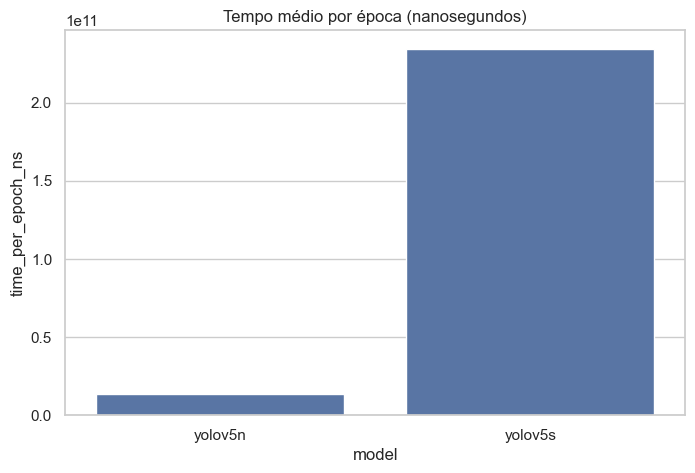

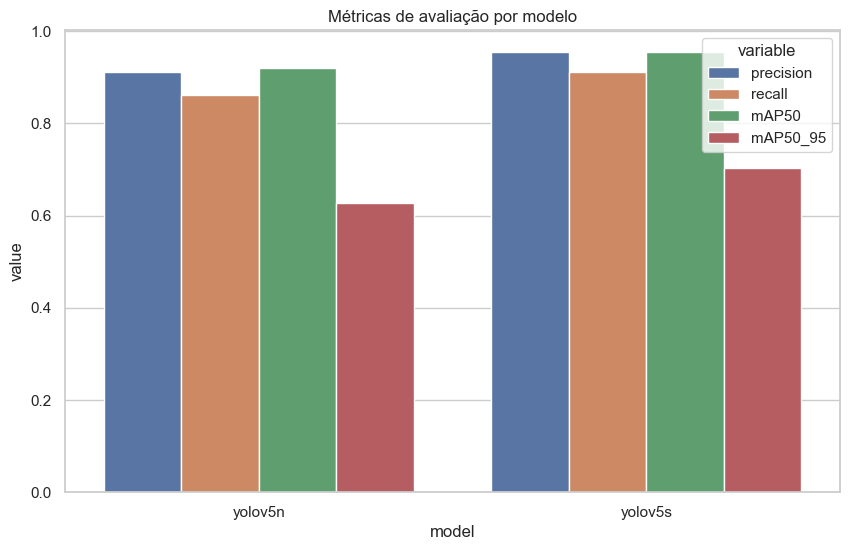

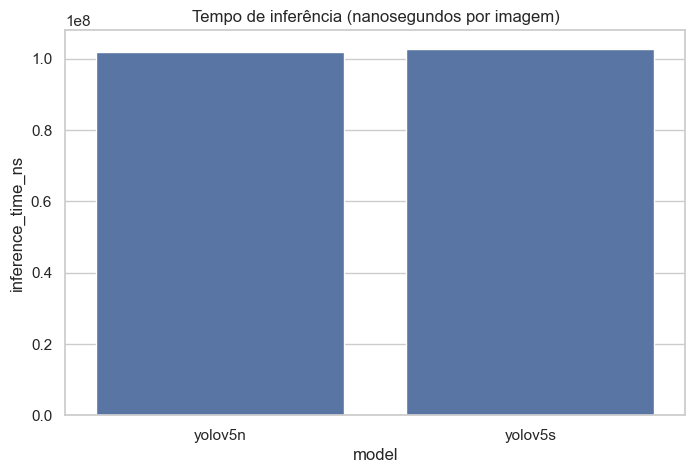

In [9]:
# =======================================
# PLOTS COM SEABORN
# =======================================
%matplotlib inline
sns.set(style="whitegrid")

# Tempo por época
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x="model", y="time_per_epoch_ns")
plt.title("Tempo médio por época (nanosegundos)")
plt.show()

# Métricas de avaliação
melted = df.melt(id_vars=["model"], value_vars=["precision", "recall", "mAP50", "mAP50_95"])
plt.figure(figsize=(10, 6))
sns.barplot(data=melted, x="model", y="value", hue="variable")
plt.title("Métricas de avaliação por modelo")
plt.show()

# Tempo de inferência
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x="model", y="inference_time_ns")
plt.title("Tempo de inferência (nanosegundos por imagem)")
plt.show()